## Download Dataset

In [7]:
import opendatasets as op
op.download("https://www.kaggle.com/datasets/shaz13/real-world-documents-collections")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  ayushi21bcs2849


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/shaz13/real-world-documents-collections


100%|███████████████████████████████████████████████████████████████████████████████| 425M/425M [01:30<00:00, 4.92MB/s]


## Import Required Libraries

In [85]:
import pandas as pd
import numpy as np
import tensorflow as tf
import string
import nltk
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import visualkeras
import os
import cv2
import shutil
import warnings
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC
warnings.filterwarnings('ignore')

In the below cell, according to the required in the given assignment, I have deleted all the folders other than the three which I would be using. 
1) Invoice
2) Email
3) Budget

   It will also decrease computation through all the folders in the given dataset.

In [45]:
# List of directories to keep (i.e., don't delete)
directories_to_keep = [
    "invoice",
    "email",
    "budget"
]

# Path where the directories are located
parent_directory = "real-world-documents-collections/docs-sm"

# List all directories in the parent directory
all_directories = [d for d in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, d))]

# Remove the directories that is not needed
for directory in all_directories:
    if directory not in directories_to_keep:
        try:
            shutil.rmtree(os.path.join(parent_directory, directory))
            print(f"Successfully removed: {directory}")
        except Exception as e:
            print(f"Error removing {directory}: {e}")



In [119]:
datasetFolder = "real-world-documents-collections/docs-sm/"

train = pathlib.Path(os.path.join(datasetFolder))

## 1) Data Exploration and preprocessing

- Analyze and clean the data to handle missing values, invalid entries, or duplicates.- 
Prepare the dataset for training and testing, including creating labels if required


Below are the functions required for the exptraction of data from the given image.

1) Extract_text_from_image-> This function is used to extract the texts from the image.
2) Get_images_labels -> To define labels to budget, invoice, email.

Note:- The images in the dataset were quite blurry and the texts were also not quite visible.

In [120]:
def extract_text_from_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

In [121]:
def get_images_labels(images, label):
    arr = []
    labels = []
    for i in images:
        img = cv2.imread(os.path.join(i))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (120, 120))
        img1 = img[0:30, 0:120]/255
        img2 = img[30:90, 0:60]/255
        img3 = img[30:90, 60:120]/255
        img4 = img[90:120, 0:120]/255
        img = np.asarray([cv2.resize(img1, (48, 48)),
                          cv2.resize(img2, (48, 48)),
                          cv2.resize(img3, (48, 48)),
                          cv2.resize(img4, (48, 48))])
        img_mean = np.mean(img)
        img = img - img_mean
        img = img / np.std(img)
        arr.append(img)
        labels.append(label)
    return [arr, labels]

In [122]:
[budget, Y_budget] = get_images_labels(list(train.glob("budget/*.*")), 0)
[email, Y_email] = get_images_labels(list(train.glob("email/*.*")), 1)
[invoice, Y_invoice] = get_images_labels(list(train.glob("invoice/*.*")), 2)

In [145]:
# Combining budget, email, invoice together
images = budget + email + invoice
labels = Y_budget + Y_email + Y_invoice

images = np.asarray(images)
labels = np.asarray(labels)

images = np.transpose(images, (0, 2, 3, 1))

In [146]:
images[0]

array([[[-7.49203308, -6.59138462,  0.27924896, -1.68475195],
        [-7.54594683,  0.27924896,  0.27924896,  0.27924896],
        [-7.54594683,  0.27924896,  0.27924896,  0.27924896],
        ...,
        [ 0.27924896,  0.27924896,  0.27924896,  0.27924896],
        [ 0.27924896,  0.27924896,  0.27924896,  0.27924896],
        [ 0.27924896,  0.27924896,  0.27924896,  0.27924896]],

       [[-4.94797797, -6.57790618,  0.27924896, -1.68138234],
        [-4.12242367,  0.27924896,  0.27924896,  0.27924896],
        [-4.12242367,  0.27924896,  0.27924896,  0.27924896],
        ...,
        [ 0.27924896,  0.27924896,  0.27924896,  0.27924896],
        [ 0.27924896,  0.27924896,  0.27924896,  0.27924896],
        [ 0.27924896,  0.27924896,  0.27924896,  0.27924896]],

       [[-1.67753136, -6.59475423,  0.27924896, -1.67753136],
        [ 0.27924896,  0.27924896,  0.27924896,  0.27924896],
        [ 0.27924896,  0.27924896,  0.27924896,  0.27924896],
        ...,
        [ 0.27924896,  0.27

In [147]:
images.shape

(947, 48, 48, 4)

In [148]:
labels.shape

(947,)

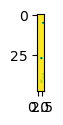

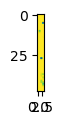

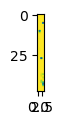

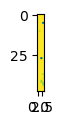

In [149]:
for i in range(4):
  plt.figure(figsize = (1, 1))
  plt.imshow(images[4][i])
  plt.grid(False)
  plt.show()

In [150]:
labels[0]

0

## 2) Document Classification

In [151]:
#(80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [152]:
X_train.shape, X_test.shape 

((757, 48, 48, 4), (190, 48, 48, 4))

In [153]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=3) 
y_test = to_categorical(y_test)

In [154]:
y_train.shape, y_test.shape

((757, 3), (190, 3))

In [155]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation="relu", input_shape=(48, 48, 4)))  # Fixed input shape
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.2))

# Flatten the 2D convolutional output to 1D for the dense layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="sigmoid"))
model.add(tf.keras.layers.Dropout(0.2))

# Output layer for 3 classes
model.add(tf.keras.layers.Dense(3, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


24/24 [==============================] - 16s 578ms/step - loss: 2.2112 - accuracy: 0.4624
Epoch 2/10
24/24 [==============================] - 14s 566ms/step - loss: 0.7317 - accuracy: 0.6380
Epoch 3/10
24/24 [==============================] - 14s 563ms/step - loss: 0.5987 - accuracy: 0.7160
Epoch 4/10
24/24 [==============================] - 13s 558ms/step - loss: 0.5620 - accuracy: 0.7371
Epoch 5/10
24/24 [==============================] - 13s 562ms/step - loss: 0.5445 - accuracy: 0.7662
Epoch 6/10
24/24 [==============================] - 14s 595ms/step - loss: 0.4644 - accuracy: 0.8111
Epoch 7/10
24/24 [==============================] - 15s 613ms/step - loss: 0.4314 - accuracy: 0.8230
Epoch 8/10
24/24 [==============================] - 16s 675ms/step - loss: 0.4127 - accuracy: 0.8190
Epoch 9/10
24/24 [==============================] - 16s 664ms/step - loss: 0.3694 - accuracy: 0.8507
Epoch 10/10
24/24 [==============================] - 17s 693ms/step - loss: 0.3741 - accu

model.compile(optimizer="adam", loss='categorical_crossentropy',
          metrics=[TruePositives(name='tp'), 
                   FalsePositives(name='fp'), 
                   TrueNegatives(name='tn'), 
                   FalseNegatives(name='fn'), 
                   "accuracy", 
                   Precision(name='precision'), 
                   Recall(name='recall'), 
                   AUC(name='auc')])

In [156]:
model.evaluate(X_test, y_test, batch_size=16)

12/12 [==============================] - 1s 66ms/step - loss: 0.7358 - accuracy: 0.6895


[0.7358003258705139, 0.6894736886024475]

In [157]:
y_pred = model.predict(X_test, batch_size=16, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

12/12 [==============================] - 1s 66ms/step


In [158]:
y_test = np.argmax(y_test, axis=1)

### Classification Report

In [159]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67        75
           1       0.92      0.84      0.88        58
           2       0.60      0.44      0.51        57

    accuracy                           0.69       190
   macro avg       0.71      0.68      0.69       190
weighted avg       0.70      0.69      0.69       190



### Confusion Matrix

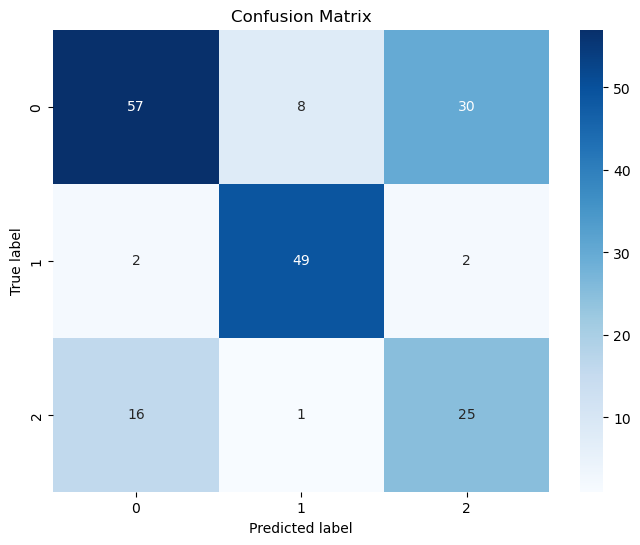

In [160]:
classes = list(range(3))  
# Compute confusion matrix
res = tf.math.confusion_matrix(y_pred, y_test).numpy()
# Create a DataFrame for visualization
cm = pd.DataFrame(res, index=classes, columns=classes)
# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

### 3) Invoice Data Extraction

- In the given dataset, the images are blurry resulting texts to not be cleared to extract properly, so there can be irrelevant or null values in the csv and json files.

In [161]:
import re
import json
import csv
import pytesseract
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"  

# Path to the invoice images
invoice_folder = "real-world-documents-collections/docs-sm/invoice"

def extract_text_from_image(image_path):
    """Extracts text from an invoice image using OCR."""
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

def extract_invoice_details(text):
    """Extracts key details such as invoice number, date, amount, and vendor from the text."""
    details = {
        "Invoice Number": None,
        "Date": None,
        "Amount": None,
        "Vendor": None
    }

    invoice_number_match = re.search(r"(?:INV|#)?\s?(\d{5,})", text)
    if invoice_number_match:
        details["Invoice Number"] = invoice_number_match.group(1)

    date_match = re.search(r"(\d{2}/\d{2}/\d{4}|\d{4}-\d{2}-\d{2})", text)
    if date_match:
        details["Date"] = date_match.group(1)

    amount_match = re.search(r"(\₹|\$|€)?\s?(\d{1,3}(?:,\d{3})*(?:\.\d{2})?)", text)
    if amount_match:
        details["Amount"] = amount_match.group(0)

    vendor_match = re.search(r"(?:Vendor|From):\s*([A-Za-z\s]+)", text)
    if vendor_match:
        details["Vendor"] = vendor_match.group(1).strip()

    return details

def extract_table_from_text(text):
    """Extracts tabular data from invoice text."""
    lines = text.split("\n")
    table_data = []
    
    for line in lines:

        match = re.match(r"([\w\s]+)\s+(\d+)\s+(\d+\.\d{2})", line)
        if match:
            item, quantity, price = match.groups()
            table_data.append({"Item": item.strip(), "Quantity": int(quantity), "Price": float(price)})

    return table_data

extracted_data = []

for filename in os.listdir(invoice_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  
        image_path = os.path.join(invoice_folder, filename)
        
        text = extract_text_from_image(image_path)
        invoice_details = extract_invoice_details(text)
        table_data = extract_table_from_text(text)
        
        invoice_details["Items"] = table_data  
        extracted_data.append(invoice_details)

csv_file = "extracted_invoices.csv"
json_file = "extracted_invoices.json"

if extracted_data:
    df = pd.DataFrame(extracted_data)
    df.to_csv(csv_file, index=False)
    print(f"Extracted invoice details saved in {csv_file}")

    # Save as JSON
    with open(json_file, "w", encoding="utf-8") as f:
        json.dump(extracted_data, f, indent=4)
    print(f"Extracted invoice details saved in {json_file}")
else:
    print("No invoice data extracted.")


Extracted invoice details saved in extracted_invoices.csv
Extracted invoice details saved in extracted_invoices.json
